#### Implement a KNN model to classify the animals in to categorie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
zoo = pd.read_csv('Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
zoo.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [6]:
zoo.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

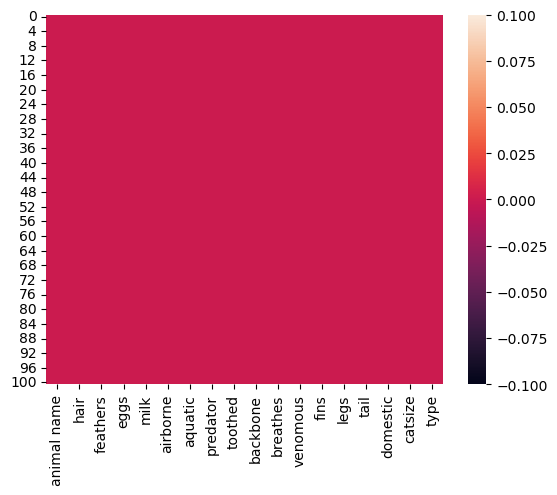

In [7]:
import seaborn as sns
col = zoo.columns
sns.heatmap(zoo.isnull());

In [8]:
zoo.shape

(101, 18)

In [9]:
zoo[zoo.duplicated()].shape

(0, 18)

In [10]:
zoo['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [11]:
zoo['domestic'].value_counts()

0    88
1    13
Name: domestic, dtype: int64

In [12]:
zoo['catsize'].value_counts()

0    57
1    44
Name: catsize, dtype: int64

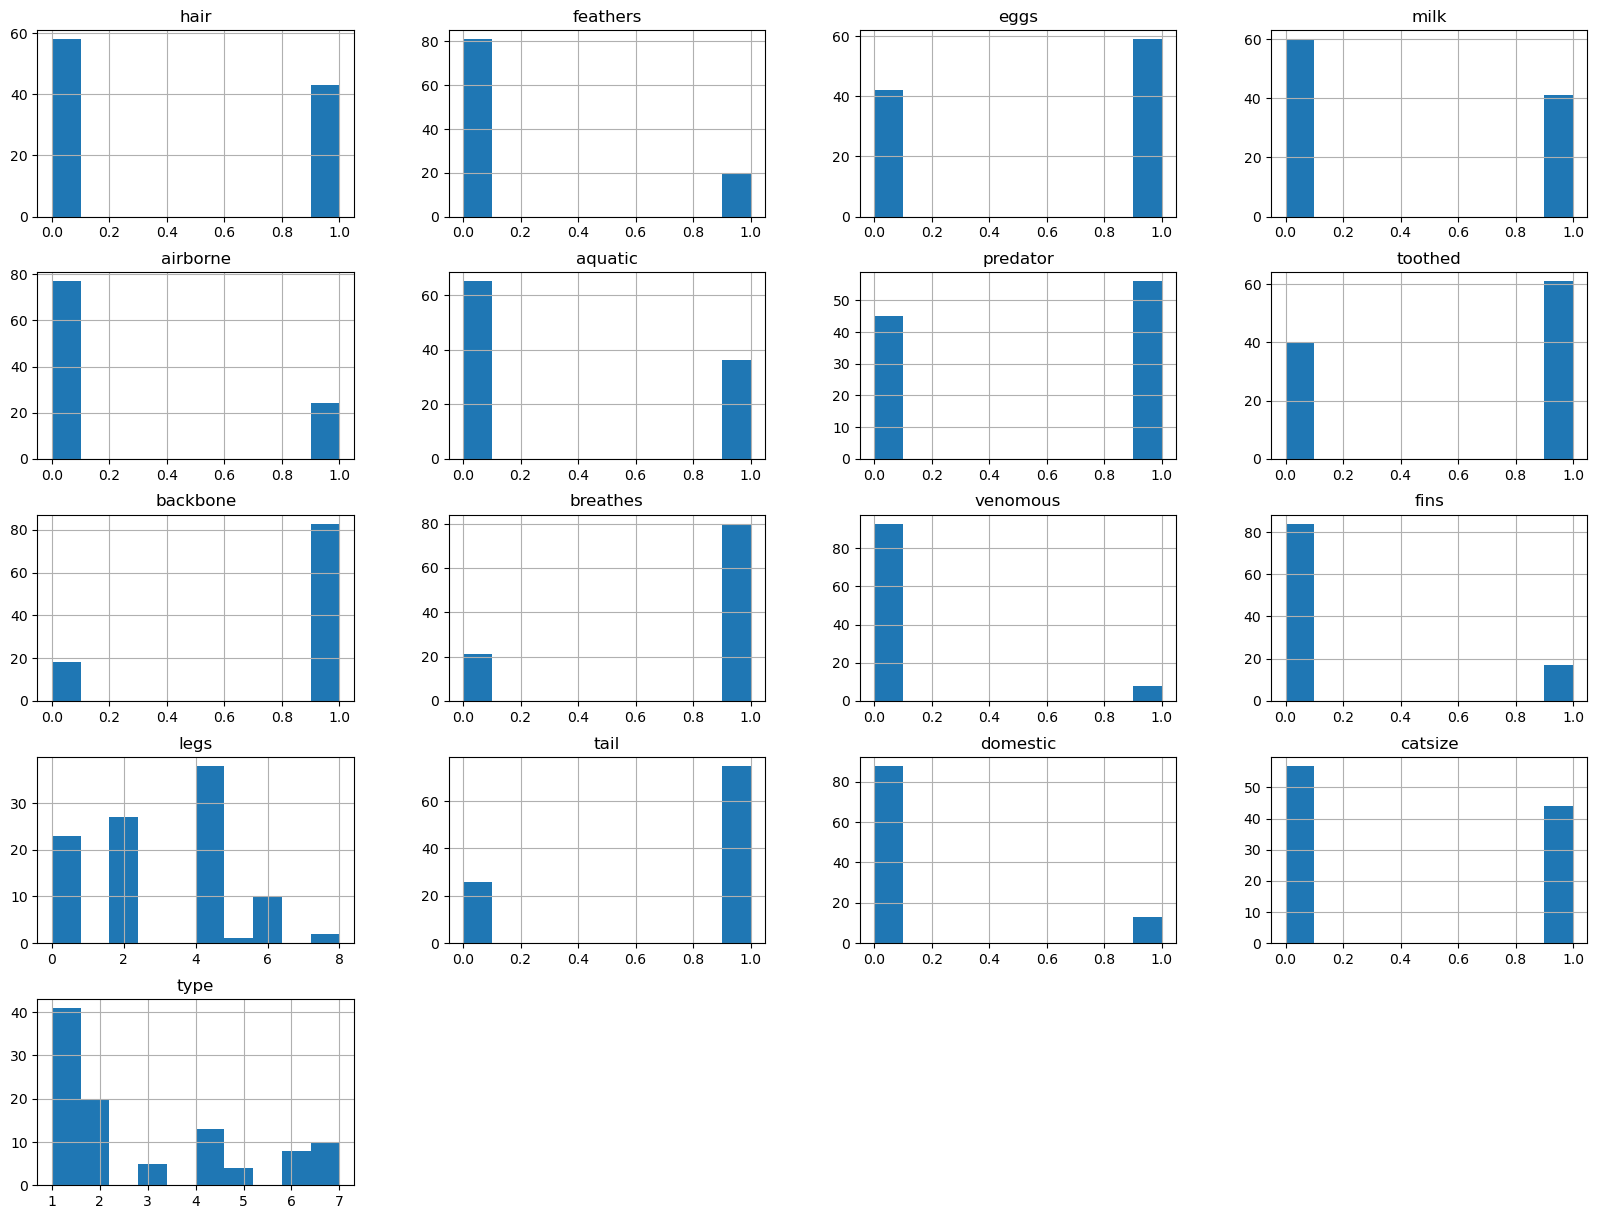

In [13]:
zoo.hist(bins=10, figsize=(20,15))
plt.show()

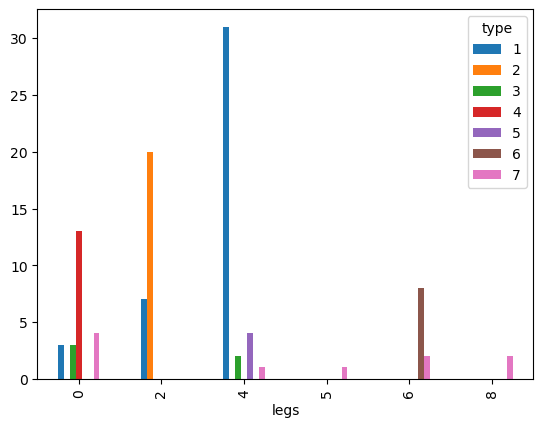

In [14]:
pd.crosstab(zoo.legs,zoo.type).plot(kind='bar')
plt.show()

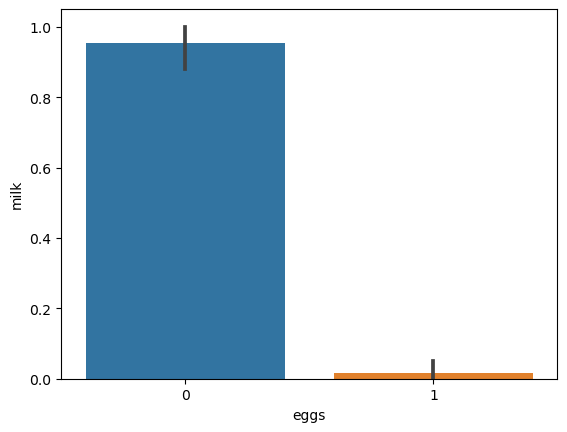

In [15]:
sns.barplot(x='eggs',y='milk',data=zoo)
plt.show()

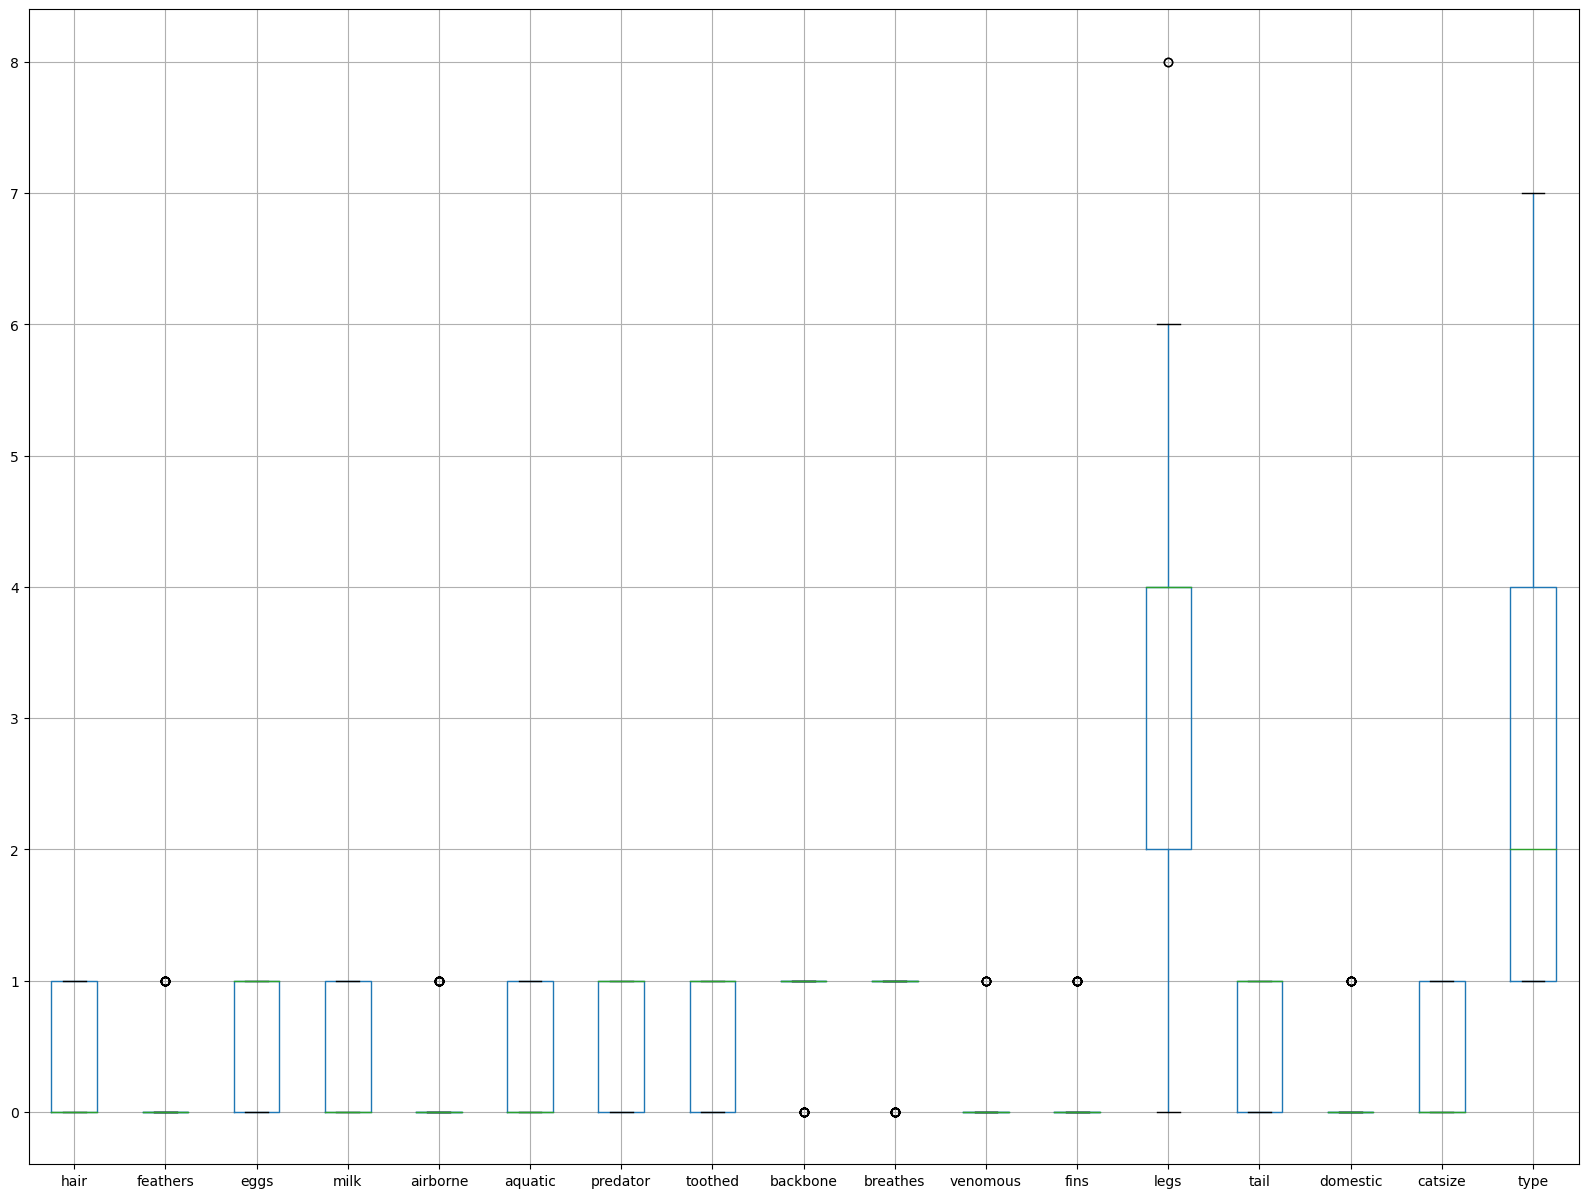

In [16]:
zoo.boxplot( figsize=(20,15))
plt.show()

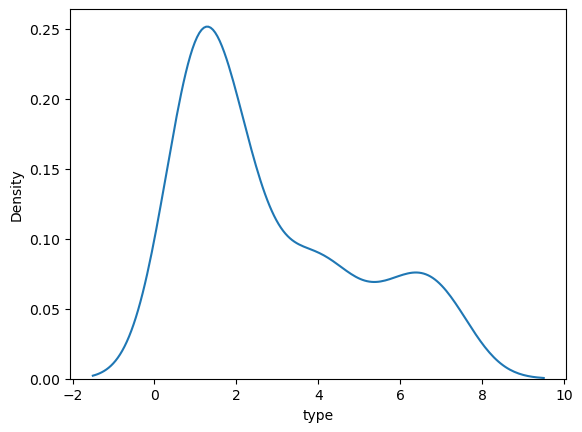

In [17]:
sns.kdeplot(zoo.type);

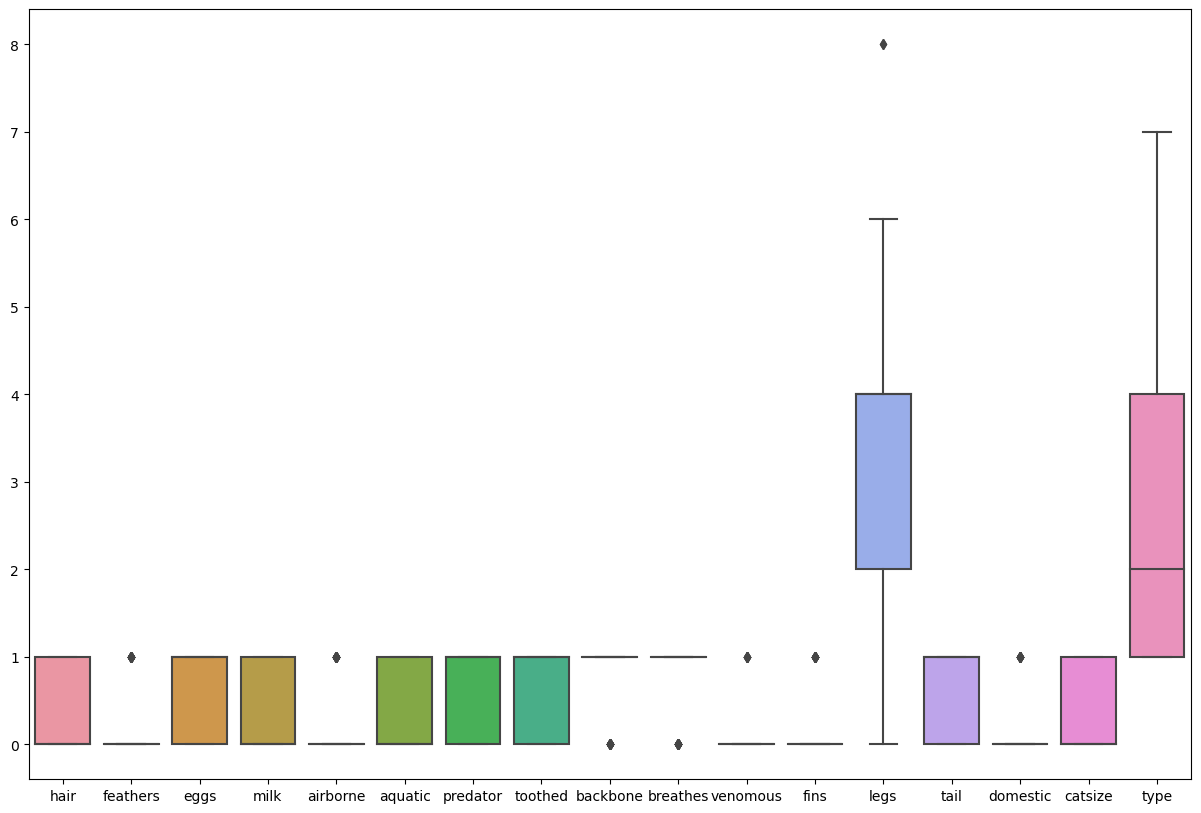

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(data=zoo);

In [19]:
X = zoo.iloc[:, 1:17]
Y = zoo['type']

In [20]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [21]:
Y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [23]:
x_train

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
73,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
19,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1
27,1,0,0,1,1,0,0,1,1,1,0,0,2,1,0,0
48,1,0,0,1,0,1,1,1,1,1,0,0,4,1,0,1
58,0,1,1,0,0,1,1,0,1,1,0,0,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,1,0,0,1,0,1,1,1,1,1,0,1,2,1,0,1
9,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0
72,0,0,0,0,0,0,1,0,0,1,1,0,8,1,0,0
12,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0


In [24]:
y_train

73    4
19    1
27    1
48    1
58    2
     ..
75    1
9     1
72    7
12    4
37    2
Name: type, Length: 70, dtype: int64

### Building Model Based on KNN

In [25]:
num_folds = 10
kfold = KFold(n_splits=10)
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

In [26]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
y_pred = model.predict(x_test)
y_pred

array([1, 2, 1, 2, 1, 7, 1, 2, 4, 5, 2, 1, 1, 1, 1, 1, 1, 1, 7, 4, 2, 1,
       6, 6, 4, 6, 6, 1, 4, 1, 1], dtype=int64)

In [28]:
y_actual = y_test
y_actual

94     1
78     2
17     1
100    2
36     1
85     7
55     1
83     2
82     4
52     5
95     2
44     1
31     1
93     1
65     1
35     1
66     1
70     1
81     7
80     3
33     2
32     1
40     6
39     6
38     4
46     7
42     6
10     1
2      4
54     1
67     1
Name: type, dtype: int64

In [29]:
pd.crosstab(y_pred, y_actual)

type,1,2,3,4,5,6,7
row_0,,,,,,,
1,15,0,0,0,0,0,0
2,0,5,0,0,0,0,0
4,0,0,1,3,0,0,0
5,0,0,0,0,1,0,0
6,0,0,0,0,0,3,1
7,0,0,0,0,0,0,2


In [30]:
accuracy_score(y_pred, y_actual)*100

93.54838709677419

In [31]:
model.score(x_train, y_train)*100

98.57142857142858

In [32]:
results = cross_val_score(model, X, Y, cv=kfold)
results.mean()*100

94.0

#### By Grid Search CV

In [33]:
n_neighbors = np.array([i for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)

In [34]:
from sklearn.model_selection import GridSearchCV
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [35]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


### Visualization

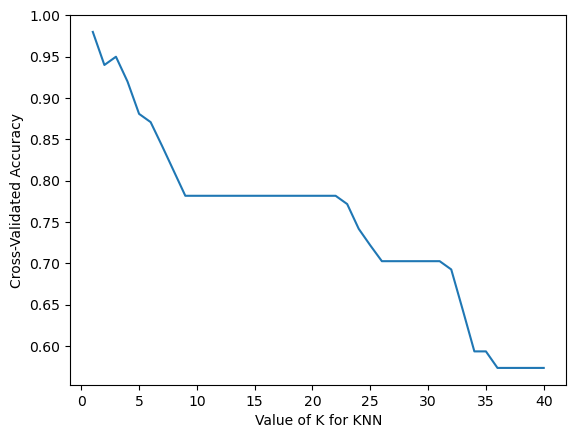

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()